## Proyecto Final 

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

#### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Plan de trabajo 
**Paso 1. Preprocesamiento de los datos**

Objetivo: limpiar y preparar los datos para el análisis y la modelización.

Pasos:

- Carga de Datos: Se importan los cuatro archivos CSV (contract.csv, personal.csv, internet.csv, phone.csv).

- Revisión de la Estructura de Datos: Se inspeccionan las primeras filas de cada archivo para entender el tipo de información que contienen (utilizando funciones info y head) y se cambian tipos de datos según corresponda.

- Detección de Datos Faltantes y posibles duplicados: Se verifica si hay valores nulos o faltantes en las columnas y se decide cómo manejarlos (rellenar, eliminar, etc.), ademas se verifica que no hayan columnas duplicadas.

- Unificación de Tablas y Conversión de Variables Categóricas: Se realiza un merge entre las tablas para generar una tabla consolidada, facilitando los pasos siguientes. Luego, se lleva a cabo la conversión de las columnas con valores "Yes"/"No" en variables binarias, reemplazando "Yes" por 1 y "No" por 0, y manejando los valores ausentes de manera adecuada.


**Paso 2. Análisis Exploratorio de Datos (EDA)** 

Objetivo: Conocer bien los datos antes de comenzar a desarrollar el modelo predictivo.

Pasos:

- Distribución de la tasa de cancelación (Churn): se hace una análisis de la distribución de los clientes activos y cancelados utilizando df['Churn'].value_counts(), evaluando el porcentaje de clientes que han cancelado el servicio para entender el desbalance de clases.

- Patrones temporales de cancelación: Se crean nuevas columnas para el año (Year) y el mes (Month) a partir de la fecha de inicio del cliente (BeginDate). Se agrupan los datos por estas nuevas columnas para visualizar la cantidad de cancelaciones por periodo y se generan gráficos para identificar tendencias de cancelación a lo largo del tiempo.

- Comparación de la tasa de cancelación entre variables categóricas: Se identifican variables categóricas como: Type, PaymentMethod, gender, InternetService, y se utilizan gráficos de barras (sns.countplot) para comparar la tasa de cancelación en función de cada una de estas variables, para analizar si hay diferencias significativas en las tasas de cancelación entre las categorías.

- Relación entre características booleanas y la tasa de cancelación: Se calcula la correlación entre las variables booleanas (e.g., PaperlessBilling, TechSupport, Partner) y la columna Churn, destacando las que tengan mayor impacto.

- Correlación entre variables numéricas y la tasa de cancelación: Se filtran las columnas numéricas relevantes, como MonthlyCharges y TotalCharges y se generan gráficos de cajas (boxplots) para analizar la distribución de estas variables según el estado de cancelación (Churn). Ademas, se calculan estadísticas descriptivas de las variables numéricas separadas por Churn para detectar diferencias significativas.

**Paso 3. Investigación de la Tarea (preguntas a considerar)**

Objetivo: Definir y comprender las preguntas a resolver y cómo abordarlas con los datos disponibles.

Pasos:

- Definir el objetivo del modelo: El modelo debe predecir la probabilidad de cancelación de un cliente (Churn), basándose en características como datos personales, servicios contratados, pagos, entre otros.

- Análisis de desequilibrio de clases: Evaluar el desbalance entre las clases (clientes que cancelan vs. clientes que permanecen). Considerar la implementación de técnicas de balance de clases, como sobremuestreo o submuestreo si es necesario.

- Preprocesamiento para modelos: Dependiendo de los modelos a utilizar, será necesario normalizar o estandarizar las variables numéricas. Por ejemplo, para la regresión logística y algunos modelos basados en árboles, no es estrictamente necesario, pero para modelos como XGBoost o CatBoost, el preprocesamiento y el ajuste de hiperparámetros son fundamentales..

- Justificación de las métricas a utilizar: Dado el desbalance de clases, se utilizará AUC-ROC como métrica principal, complementada con recall y F1 Score para evaluar la capacidad del modelo de identificar clientes propensos a cancelar. La exactitud se considerará, aunque es menos informativa en casos desbalanceados. Posteriormente, se aplicará SMOTE para mejorar el rendimiento

**Paso 4. Desarrollo de Modelo**

Objetivo: Construir y entrenar un modelo predictivo para identificar clientes propensos a la cancelación.

Pasos:

- Selección de modelos: Probar con modelos de clasificación binaria con los que ya se haya trabajado para predecir la cancelación de clientes (Churn), como:
    * Regresión logística 
    * Árboles de decisión
    * Random Forest
    * XGBoost
    * CatBoost

- División de datos y evaluación del modelo: El conjunto de datos se divide en tres partes: 80% para entrenamiento, 10% para validación y 10% para prueba. El modelo se entrena utilizando el conjunto de entrenamiento y su rendimiento se evalúa en el conjunto de validación mediante las métricas AUC-ROC, exactitud, recall y F1 Score. Para ello, se implementa la función evaluate_model. Además, se evalúa la predicción del modelo ajustado utilizando el conjunto de prueba, implementando la función evaluate_model_with_test, que emplea las mismas métricas que la función anterior.

- Ajuste de hiperparámetros: Para optimizar el rendimiento de cada modelo, se utilizará GridSearchCV para buscar los mejores hiperparámetros. Esto permite encontrar la configuración óptima de parámetros que maximice el rendimiento del modelo en el conjunto de datos.

**Paso 5. Preparación del Informe**

Objetivo: Documentar y comunicar los resultados y hallazgos del análisis y modelado.

Pasos:

- Resumen del Preprocesamiento y del Análisis Exploratorio: Explicar brevemente los cambios realizados en los datos y presentar los hallazgos clave del EDA.

- Resultados del Modelado: Incluir los resultados de los modelos entrenados, destacando el rendimiento de cada uno con las diferentes métricas. Justificar la elección del modelo final y los parámetros seleccionados.

- Recomendaciones para la empresa: Proponer acciones concretas basadas en los hallazgos, por ejemplo, identificar características clave de clientes con alta probabilidad de cancelación y sugerir intervenciones, ofertas personalizadas o estrategias de retención.

- Conclusiones finales: Resumir los resultados obtenidos y cómo el modelo puede ser útil para predecir la cancelación de clientes y ayudar a mejorar la estrategia de marketing de la empresa.

### Paso 1. Preprocesamiento de los Datos 
Objetivo: limpiar y preparar los datos para el análisis y la modelización.



In [1]:
pip install scikit-learn catboost

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
#carga de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn import metrics

In [4]:
#se importan los archivos
phone = pd.read_csv("C:/Users/macaa/Git/proyectos/Sprint 17/phone.csv")
contract = pd.read_csv("C:/Users/macaa/Git/proyectos/Sprint 17/contract.csv")
internet = pd.read_csv("C:/Users/macaa/Git/proyectos/Sprint 17/internet.csv")
personal = pd.read_csv("C:/Users/macaa/Git/proyectos/Sprint 17/personal.csv")


In [5]:
# se usan las funciones info y head para inspección del dataset
phone.info()
print(phone.head())
phone.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


customerID       6361
MultipleLines       2
dtype: int64

Dataset **phone** sin valores faltantes o duplicados.

In [6]:
# se usan las funciones info y head para inspección del dataset
internet.info()
print(internet.head())
internet.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4 

customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64

Dataset **Internet** sin valores faltantes o duplicados.

In [7]:
# se usan las funciones info y head para inspección del dataset
personal.info()
print(personal.head())
personal.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No


customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64

Dataset **personal** sin valores duplicados o faltantes

In [8]:
# se usan las funciones info y head para inspección del dataset
contract.info()
print(contract.head())
contract.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00

customerID          7043
BeginDate             77
EndDate                5
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
dtype: int64

En este conjunto de datos, varias columnas presentan tipos de datos incorrectos. Para abordar este problema, comenzamos con la columna "TotalCharges". En primer lugar, se filtran las filas que contienen valores no numéricos para examinar su contenido. Al identificar que estos valores corresponden a espacios en blanco, se decide convertir los valores no modificados a NaN. Dado que solo hay 11 filas afectadas, se opta por eliminar estas filas del dataset. Finalmente, se cambia el tipo de dato de la columna a "float" para asegurar su correcto procesamiento en los análisis posteriores.


In [9]:
# se filtran las filas que no pueden ser convertidas a números
non_numeric_values = contract[~contract['TotalCharges'].apply(pd.to_numeric, errors='coerce').notna()]

# se muestran los valores no numéricos
print(non_numeric_values['TotalCharges'].unique())
print(non_numeric_values.head(20))


[' ']
      customerID   BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI  2020-02-01      No  Two year              Yes   
753   3115-CZMZD  2020-02-01      No  Two year               No   
936   5709-LVOEQ  2020-02-01      No  Two year               No   
1082  4367-NUYAO  2020-02-01      No  Two year               No   
1340  1371-DWPAZ  2020-02-01      No  Two year               No   
3331  7644-OMVMY  2020-02-01      No  Two year               No   
3826  3213-VVOLG  2020-02-01      No  Two year               No   
4380  2520-SGTTA  2020-02-01      No  Two year               No   
5218  2923-ARZLG  2020-02-01      No  One year              Yes   
6670  4075-WKNIU  2020-02-01      No  Two year               No   
6754  2775-SEFEE  2020-02-01      No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges  
488   Bank transfer (automatic)           52.55               
753                Mailed check           20.25               


In [10]:
# aseguramos que los valores que no son numéricos se convierten a NaN
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

# se verifica si la columna tiene valores nulos (NaN) que podrían haberse creado
print(contract['TotalCharges'].isnull().sum())  


11


In [11]:
#al ser pocos valores ausentes se decide eliminar estas filas
contract = contract.dropna(subset=['TotalCharges'])
#se cambia tipo de dato
contract['TotalCharges'] = contract['TotalCharges'].astype(float) 


Se continúa con la conversión de tipos de datos, transformando las columnas "BeginDate" y "EndDate" al tipo de dato datetime para facilitar su análisis. A partir de la columna "EndDate", se crea una nueva columna binaria, donde el valor será 0 si la persona sigue activa (es decir, si "EndDate" está vacía) y 1 si "EndDate" contiene una fecha, lo que indica que la persona ha cancelado el servicio. Esta nueva columna se utilizará como la variable objetivo (Target) en el modelo, ya que refleja el "Churn" (cancelación de clientes).

In [12]:
# se convierte 'BeginDate' y 'EndDate' a tipo datetime
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

# se crea nueva columna 'Churn' que será 1 si 'EndDate' tiene valor, 0 si está vacía
contract['Churn'] = contract['EndDate'].notnull().astype(int)

# se verifica los valores de las columnas cambiadas
print(contract[['BeginDate', 'EndDate', 'Churn']].head())

   BeginDate    EndDate  Churn
0 2020-01-01        NaT      0
1 2017-04-01        NaT      0
2 2019-10-01 2019-12-01      1
3 2016-05-01        NaT      0
4 2019-09-01 2019-11-01      1


C:\Users\macaa\AppData\Local\Temp\ipykernel_18332\1406194159.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')



Se realiza la ultima revisión de filas duplicadas o valores ausentes en los 4 DF.


In [13]:
#revisión de filas duplicadas
print(phone.duplicated().sum())
print(contract.duplicated().sum())
print(internet.duplicated().sum())
print(personal.duplicated().sum())
print()
#revisión valores ausentes 
print(phone.isna().sum())
print(contract.isna().sum())
print(internet.isna().sum())
print(personal.isna().sum())

0
0
0
0

customerID       0
MultipleLines    0
dtype: int64
customerID             0
BeginDate              0
EndDate             5163
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


Los únicos valores faltantes en el conjunto de datos corresponden a la columna "EndDate", los cuales fueron generados por la transformación de tipo de dato. Aunque es probable que se decida eliminarla más adelante, por el momento se mantendra en el dataset como medida precautoria.


Al ver que todo esta en orden se procede a unificar todas las tablas en un unico dataframe para facilitar el analisis de los datos.


In [14]:
# se realiza el merge de las tablas en base al customerID
df = pd.merge(contract, personal, on='customerID', how='left')
df = pd.merge(df, internet, on='customerID', how='left')
df = pd.merge(df, phone, on='customerID', how='left')


Continuamos convirtiendo las columnas categóricas en variables binarias. Se asume que, en caso de que estas columnas binarias contengan valores ausentes, estos serán considerados como 0. Esto se debe a que la ausencia de un valor en estas columnas indica que el cliente no está registrado en la tabla de internet, lo que implica que no ha contratado ese servicio. Por el momento tambien se llenaran los valores ausentes de la columna 'InternetService' con "No".


In [15]:
# columnas compuestas por valores Yes/No  
yes_no_columns = ['MultipleLines', 'PaperlessBilling', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# se reemplaza 'Yes' por 1, 'No' por 0, y los valores NaN también los convierte en 0
df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0}).fillna(0).astype(int)

# se reemplazar valores ausentes en la columna 'InternetService' con "No"
df['InternetService'] = df['InternetService'].fillna("No")


C:\Users\macaa\AppData\Local\Temp\ipykernel_18332\2367173330.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0}).fillna(0).astype(int)


In [16]:
#revisión de filas duplicadas y valores ausentes
print(df.duplicated().sum())
print(df.isna().sum())

0
customerID             0
BeginDate              0
EndDate             5163
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
dtype: int64


In [17]:
# inspección del dataset
print(df.head())

   customerID  BeginDate    EndDate            Type  PaperlessBilling  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month                 1   
1  5575-GNVDE 2017-04-01        NaT        One year                 0   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month                 1   
3  7795-CFOCW 2016-05-01        NaT        One year                 0   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month                 1   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn  gender  \
0           Electronic check           29.85         29.85      0  Female   
1               Mailed check           56.95       1889.50      0    Male   
2               Mailed check           53.85        108.15      1    Male   
3  Bank transfer (automatic)           42.30       1840.75      0    Male   
4           Electronic check           70.70        151.65      1  Female   

   ...  Partner  Dependents  InternetService OnlineSecurity  OnlineBackup  \
0  ...        1      

In [18]:
# inspección del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int32         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Churn             7032 non-null   int32         
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int32         
 12  Dependents        7032 non-null   int32         
 13  InternetService   7032 non-null   object        
 14  OnlineSecurity    7032 n

### Paso 2. Análisis Exploratorio de Datos (EDA)
Objetivo: Conocer bien los datos antes de comenzar a desarrollar el modelo predictivo.


1ra pregunta: ¿Cuántos clientes se han dado de baja (Churn) y cuántos siguen activos ?

In [19]:
# distribución de la cancelación
df['Churn'].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

_Actualmente casi un 27% de los clientes totales han cancelado sus servicios con Interconnet._

2da pregunta: ¿Existen patrones temporales en la cancelación?

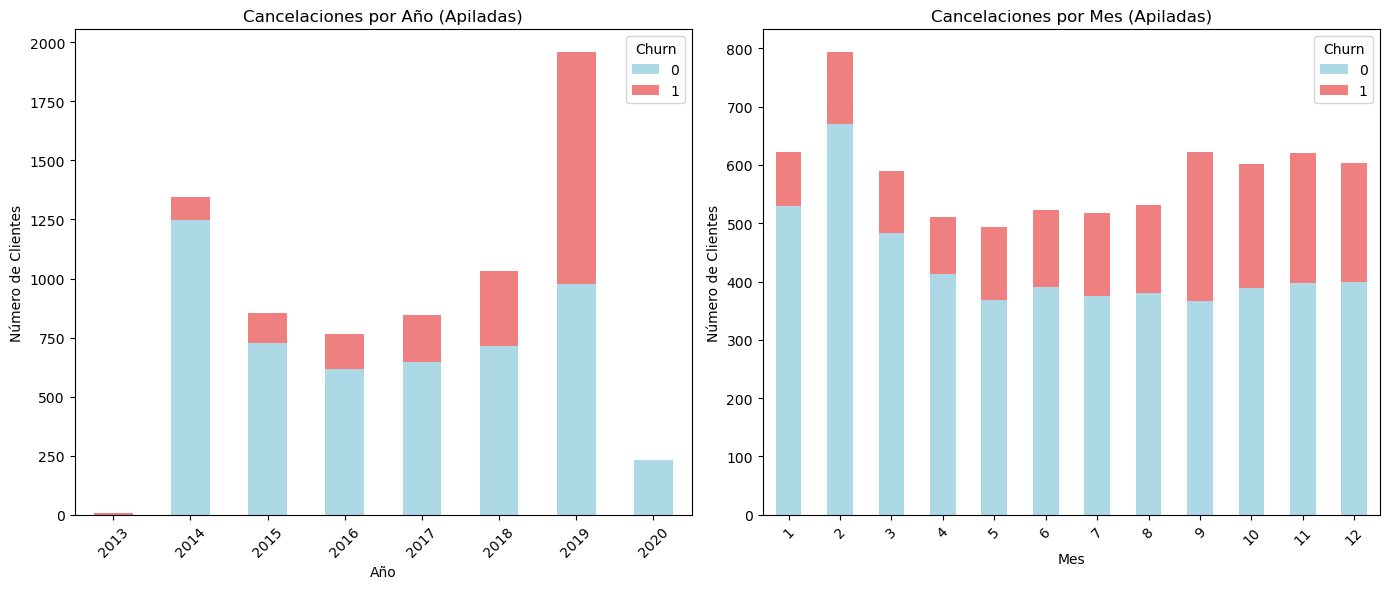

In [20]:
# distribución de clientes activos vs cancelados a lo largo del tiempo (por año o mes)
df['Year'] = df['BeginDate'].dt.year
df['Month'] = df['BeginDate'].dt.month

# número de cancelaciones por año y mes, agrupando por Churn
df_year = df.groupby(['Year', 'Churn']).size().unstack(fill_value=0)
df_month = df.groupby(['Month', 'Churn']).size().unstack(fill_value=0)

# gráfico con ambos subgráficos
plt.figure(figsize=(14, 6))

# Subgráfico 1
plt.subplot(1, 2, 1) 
df_year.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=plt.gca())
plt.title('Cancelaciones por Año (Apiladas)')
plt.xlabel('Año')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)

# Subgráfico 2
plt.subplot(1, 2, 2) 
df_month.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=plt.gca())
plt.title('Cancelaciones por Mes (Apiladas)')
plt.xlabel('Mes')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

_Los gráficos muestran una tendencia creciente en las cancelaciones de clientes a lo largo de los años, destacando un aumento notable en 2019. Este año resalta como el de mayor cantidad de cancelaciones, lo que podría indicar que algo en el servicio o en el mercado impactó negativamente la fidelidad de los usuarios._

_En cuanto a los meses, se observa un patrón de mayor cancelación entre septiembre y diciembre, lo que podría estar relacionado con factores estacionales o cambios específicos en esos períodos. Por otro lado, los primeros meses del año, especialmente enero y febrero, presentan una menor tasa de cancelación._


3ra pregunta: ¿Hay diferencias en la tasa de cancelación entre distintos tipos de pago, genro del cliente , Internet (DSL o fibra óptica), etc.?(variables categoricas)

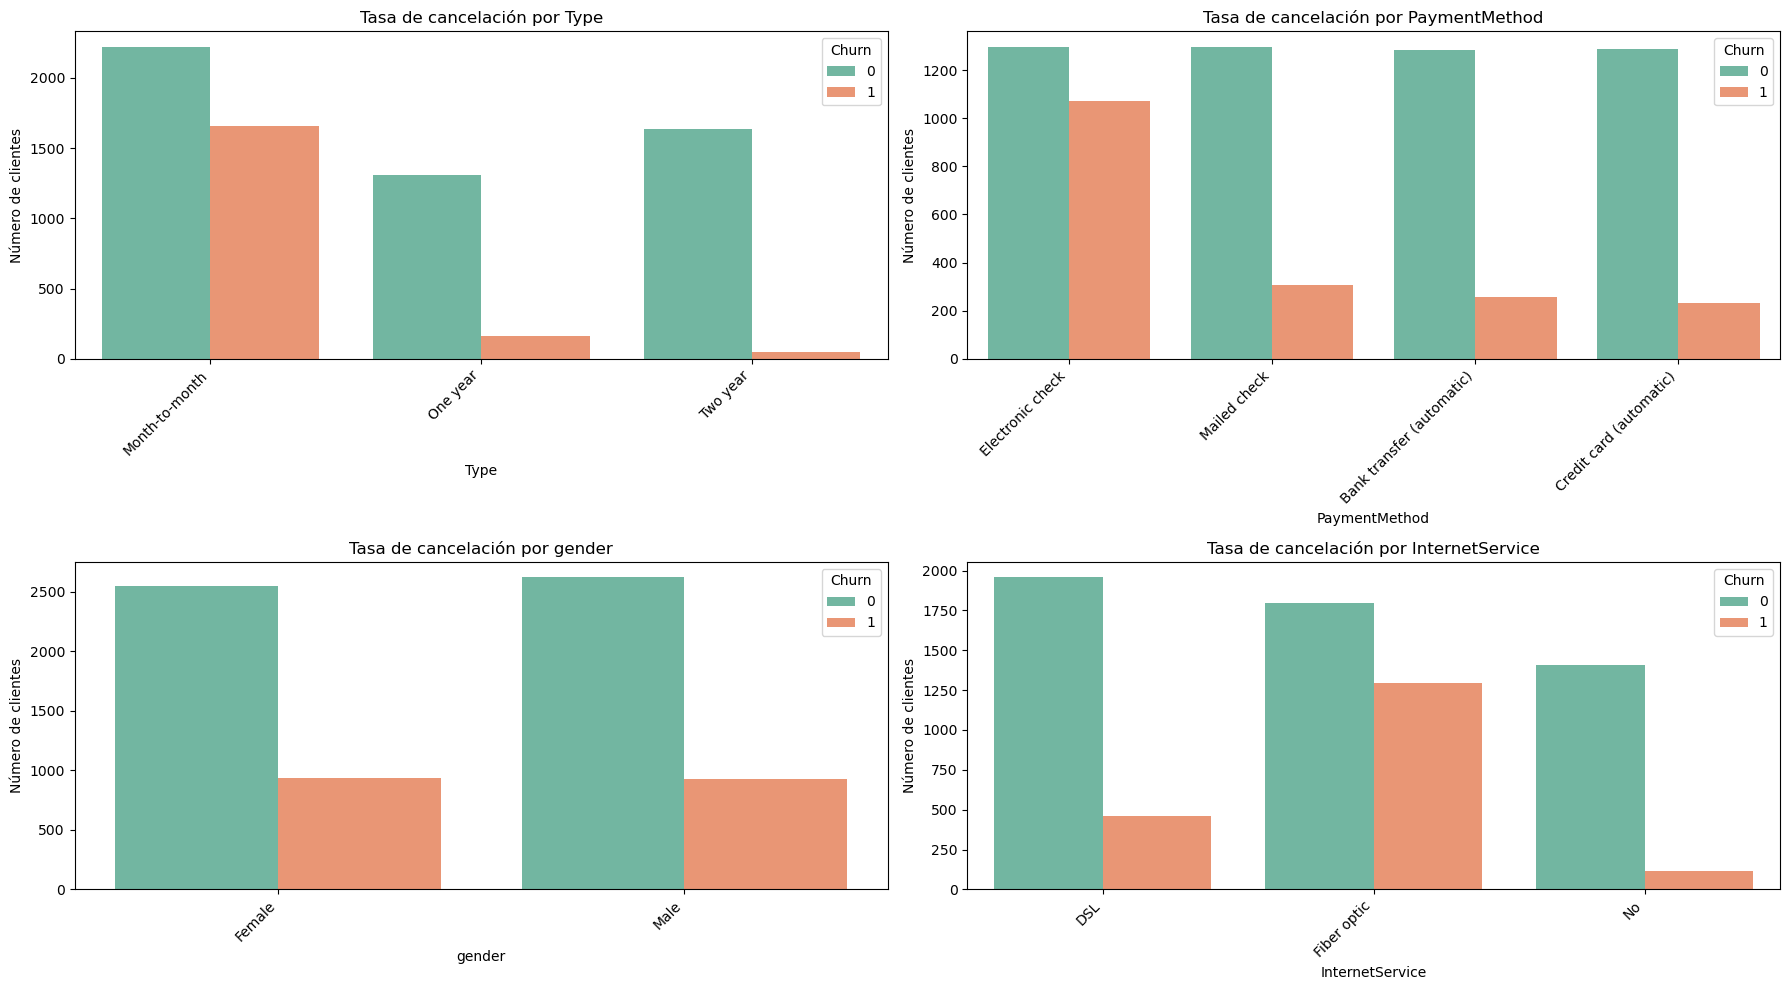

In [21]:
# variables categóricas 
categorical_vars = ['Type', 'PaymentMethod', 'gender', 'InternetService']

# gráfico para cada variable categórica
plt.figure(figsize=(18, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)  
    sns.countplot(x=var, hue='Churn', data=df, palette='Set2')
    plt.title(f'Tasa de cancelación por {var}')
    plt.xlabel(var)
    plt.ylabel('Número de clientes')
    plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

_Los clientes con contrato mes a mes muestran una mayor cantidad de cancelaciones, mientras que los contratos de un año y dos años presentan un número significativamente menor de cancelaciones. En relación con los métodos de pago, los clientes que utilizan Electronic check tienen el mayor número de cancelaciones, mientras que aquellos que emplean Bank transfer o Credit card tienen menos cancelaciones._

_No se observan grandes diferencias en la tasa de cancelación entre géneros. Sin embargo, los clientes que utilizan fibra óptica tienen una cantidad considerablemente mayor de cancelaciones en comparación con los que utilizan DSL._


4ta pregunta: ¿Cómo se relacionan las características booleanas con la tasa de cancelación?

In [22]:
# características booleanas
boolean_columns = ['PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'SeniorCitizen', 'Partner', 'Dependents']

# calcular la correlación entre las columnas booleanas y la variable Churn
correlation = df[boolean_columns + ['Churn']].corr()

# mostrar solo la correlación de las columnas booleanas con 'Churn'
correlation_with_churn = correlation['Churn'].sort_values(ascending=False)


print(correlation_with_churn)

Churn               1.000000
PaperlessBilling    0.191454
SeniorCitizen       0.150541
StreamingTV         0.063254
StreamingMovies     0.060860
MultipleLines       0.040033
DeviceProtection   -0.066193
OnlineBackup       -0.082307
Partner            -0.149982
Dependents         -0.163128
TechSupport        -0.164716
OnlineSecurity     -0.171270
Name: Churn, dtype: float64



_Las características más relacionadas con correlaciones negativas son 'Partner', 'Dependents', 'TechSupport' y 'OnlineSecurity', lo que indica que los clientes sin pareja o dependientes, o que no usan soporte técnico o seguridad en línea, tienden a cancelar más. 'PaperlessBilling' y 'SeniorCitizen' tienen una correlación positiva, lo que sugiere que los clientes que usan facturación electrónica o son mayores tienen una ligera mayor probabilidad de cancelar. Las demás variables booleanas tienen una correlación baja con la cancelación._

5ta pregunta: ¿Exite correlación entre la tasa de cancelación y las variables númericas (MonthlyCharges, TotalCharges)?

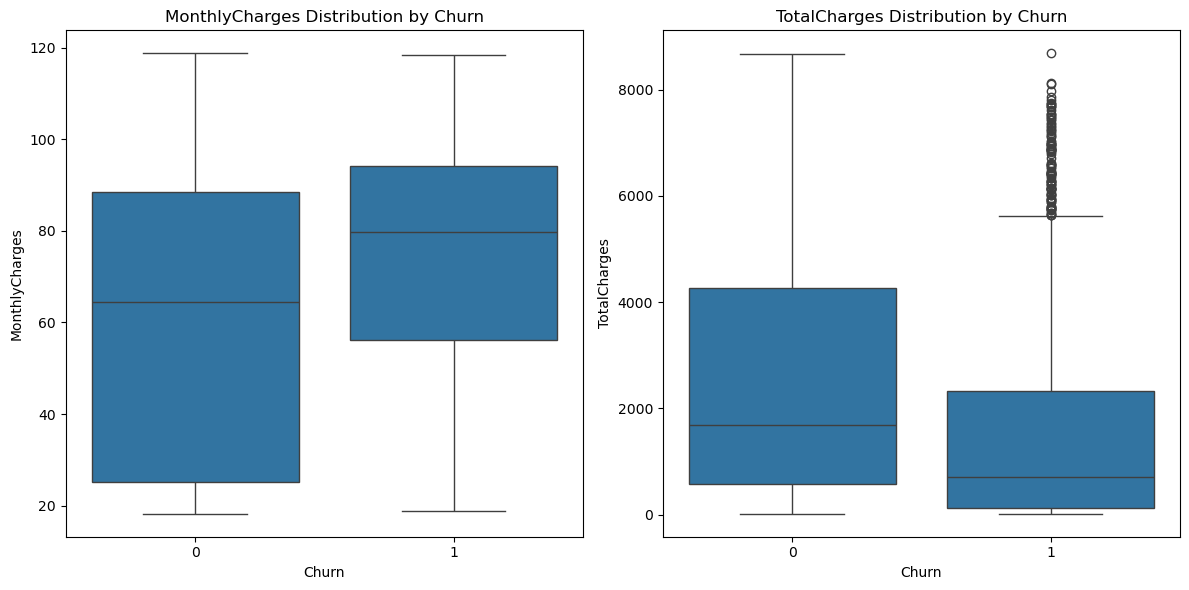

In [23]:
# se filtra solo las columnas 'MonthlyCharges' y 'TotalCharges' junto con la variable 'Churn'
df_numeric = df[['MonthlyCharges', 'TotalCharges', 'Churn']]


plt.figure(figsize=(12, 6))

# boxplot para 'MonthlyCharges' y 'Churn'
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_numeric)
plt.title('MonthlyCharges Distribution by Churn')

# boxplot para 'TotalCharges' y 'Churn'
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='TotalCharges', data=df_numeric)
plt.title('TotalCharges Distribution by Churn')

plt.tight_layout()
plt.show()


In [24]:
# estadísticas descriptivas para MonthlyCharges y TotalCharges por Churn
descriptive_stats = df.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].describe()
print("Estadísticas descriptivas por Churn:")
print(descriptive_stats)


Estadísticas descriptivas por Churn:
      MonthlyCharges                                                     \
               count       mean        std    min    25%    50%     75%   
Churn                                                                     
0             5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475   
1             1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200   

              TotalCharges                                                     \
          max        count         mean          std    min      25%      50%   
Churn                                                                           
0      118.75       5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
1      118.35       1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                          
            75%      max  
Churn                     
0      4264.125  8672.45  
1      2331.300  8684.80  


_Los clientes que no abandonaron (Churn = 0) tienen un promedio de 61.31 en MonthlyCharges, mientras que los que abandonaron (Churn = 1) tienen un promedio de 74.44, lo que indica que los que abandonan tienden a pagar más mensualmente._
_En cuanto a TotalCharges, los clientes que no abandonaron tienen un promedio de 2555.34, mientras que los que abandonaron tienen un promedio de 1531.80, sugiriendo que los clientes que abandonan tienden a tener un TotalCharges más bajo._

_Estos resultados demuestran que existe una correlación significativa entre las variables MonthlyCharges y TotalCharges y el Churn. Tanto MonthlyCharges como TotalCharges presentan diferencias estadísticamente significativas entre los clientes que abandonaron y los que no, lo que sugiere que los clientes que abandonan tienden a tener un valor más alto en MonthlyCharges y un valor más bajo en TotalCharges en comparación con los clientes que permanecen._



### Paso 3. Investigación de la Tarea (preguntas a considerar)
Objetivo: Definir y comprender las preguntas a resolver y cómo abordarlas con los datos disponibles.


El objetivo de este paso es asegurarnos de que tenemos claro que vamos a predecir la probabilidad de cancelación de los clientes (Churn). Para este tipo de problemas, vamos a usar modelos de clasificación binaria.

Análisis de desequilibrio de clases:
Como ya se mencionó, tenemos un desbalance entre clientes que se dan de baja (Churn = 1) y los que no (Churn = 0). Se puede evaluar este desbalance con un gráfico de barras para entender el impacto.

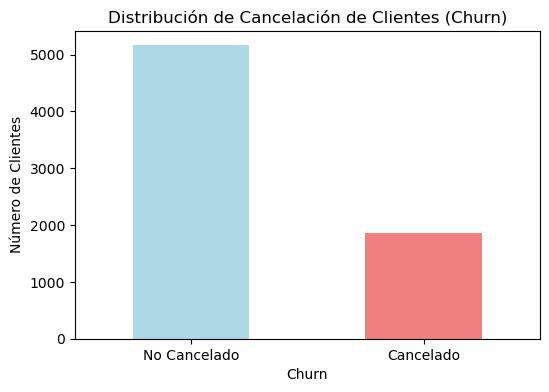

In [25]:
# visualización del desequilibrio de clases
plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Distribución de Cancelación de Clientes (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Cancelado', 'Cancelado'], rotation=0)
plt.show()

Se aprovecha de eliminar columnas que no son relevantes para el modelo, como customerID, gender (como vimos durante el EDA) y cualquier otra que no aporte valor predictivo.

In [26]:
df = df.drop(columns=['customerID', 'gender','BeginDate','EndDate'])


Se realiza un análisis preliminar de los datos para asegurarnos de que las columnas restantes sean las correctas y contengan datos relevantes.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   int32  
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   Churn             7032 non-null   int32  
 6   SeniorCitizen     7032 non-null   int64  
 7   Partner           7032 non-null   int32  
 8   Dependents        7032 non-null   int32  
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   int32  
 11  OnlineBackup      7032 non-null   int32  
 12  DeviceProtection  7032 non-null   int32  
 13  TechSupport       7032 non-null   int32  
 14  StreamingTV       7032 non-null   int32  
 15  StreamingMovies   7032 non-null   int32  
 16  MultipleLines     7032 non-null   int32  


Para las columnas categóricas restantes, se realiza un proceso de One-Hot Encoding. 

In [28]:
# se identifican las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)



Para normalizar las características numéricas, se aplica un escalado usando StandardScaler, lo que ayuda a mejorar el rendimiento de los modelos.

In [29]:
# se seleccionan solo las columnas numéricas para escalar
numerical_columns = ['MonthlyCharges', 'TotalCharges']  # Agrega otras columnas numéricas si las tienes

# inicializamos el scaler
scaler = StandardScaler()

# se aplica el escalado a las columnas seleccionadas
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])



Dado que el modelo trata con un problema de clasificación binaria y un posible desbalance de clases, se seleccionará el AUC-ROC como la métrica principal, ya que es especialmente útil en situaciones de desbalance. Además, se utilizarán recall y F1 Score como métricas complementarias, ya que proporcionan una visión más precisa sobre la capacidad del modelo para identificar correctamente a los clientes propensos a cancelar el servicio, especialmente en contextos de clases desbalanceadas. Si bien la exactitud (accuracy) también se empleará, es importante considerar que en problemas con desbalance de clases, esta métrica puede no reflejar completamente el rendimiento del modelo en la identificación de las clases menos representadas. En pasos posteriores, se tratará el desbalance mediante la técnica de SMOTE, que aplicará un sobreajuste en las clases minoritarias para mejorar la capacidad predictiva del modelo.

### Paso 4. Desarrollo de Modelo
Objetivo: Construir y entrenar un modelo predictivo para identificar clientes propensos a la cancelación.


Ese paso se empieza definiendo una función, para evaluar el rendimiento de un modelo predictivo, separando las características (X) y la columna objetivo (y), dividiendo los datos en conjuntos de entrenamiento, validación y prueba (80%-10%-10%), aplicando SMOTE para balancear las clases y luego entrenando el modelo con los parámetros especificados. Después, se calcula la exactitud, AUC-ROC, recall, F1 Score y se grafica la matriz de confusión y la curva ROC.

 la función contiene los siguientes argumentos:

    df: DataFrame que contiene las características y la columna objetivo.
    target_column: Nombre de la columna objetivo.
    model: Modelo a evaluar (e.g. LogisticRegression, RandomForestClassifier).
    params: Parámetros para ajustar el modelo.
    test_size: Proporción del conjunto de datos para pruebas (default 0.2).


In [30]:
def evaluate_model(df, target_column, model, params, test_size=0.2):
    # se separan las características (X) y el objetivo (y)
    X = df.drop(target_column, axis=1)  
    y = df[target_column]
    
    # se dividen los datos en entrenamiento, validación y prueba (80%, 10%, 10%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=12345)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12345)

    # se aplica balanceo con SMOTE (oversampling)
    smote = SMOTE(random_state=12345)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # se ajusta el modelo con los parámetros proporcionados
    model.set_params(**params)
    model.fit(X_train_res, y_train_res)
    
    # predicciones sobre el conjunto de validación
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)[:, 1]  # Probabilidades para AUC-ROC
    
    # calcular las métricas
    eval_stats = {}

    # Exactitud
    eval_stats['Accuracy'] = accuracy_score(y_val, y_pred)
    
    # AUC ROC
    fpr, tpr, roc_thresholds = metrics.roc_curve(y_val, y_pred_prob)
    roc_auc = roc_auc_score(y_val, y_pred_prob)
    eval_stats['ROC AUC'] = roc_auc

    # Recall
    eval_stats['Recall'] = recall_score(y_val, y_pred)

    # F1 Score
    eval_stats['F1 Score'] = f1_score(y_val, y_pred)

    # Matriz de Confusión
    cm = confusion_matrix(y_val, y_pred)
    
    # print de las métricas
    print("Evaluación del modelo:")
    df_eval_stats = pd.DataFrame(eval_stats, index=[0]).round(2)
    print(df_eval_stats)
    
    # se grafica la matriz de confusión y la curva ROC en el mismo gráfico
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  
    
    # matriz de confusión
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción 0', 'Predicción 1'], 
                yticklabels=['Real 0', 'Real 1'], ax=ax1)
    ax1.set_title('Matriz de Confusión')
    ax1.set_xlabel('Predicción')
    ax1.set_ylabel('Real')

    # curva ROC
    ax2.plot(fpr, tpr, color='blue', label=f'ROC AUC={roc_auc:.2f}')
    ax2.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax2.set_xlim([-0.02, 1.02])    
    ax2.set_ylim([-0.02, 1.02])
    ax2.set_xlabel('FPR')
    ax2.set_ylabel('TPR')
    ax2.legend(loc='lower center')        
    ax2.set_title('Curva ROC')

    # se muestran los gráficos
    plt.tight_layout()
    plt.show()

    return df_eval_stats

Además, se crea una segunda función con el propósito de evaluar el modelo previamente entrenado utilizando el conjunto de prueba. En este caso, tambien se aplica SMOTE para equilibrar las clases en el conjunto de entrenamiento y se calculan las métricas de exactitud, AUC-ROC, recall y F1 Score. Esto permite comparar si existen diferencias significativas en las métricas obtenidas respecto a las de la función anterior.

 la función contiene los siguientes argumentos:
    

    df: Conjunto de datos que contiene tanto las características como la columna objetivo.
    target_column: Nombre de la columna objetivo.
    model: El modelo que fue previamente ajustado.
    smote: Objeto de la técnica SMOTE para balanceo de clases (default es None).
    


In [31]:
##### USAR V2 SIN PARAMS
def evaluate_model_with_test(df, target_column, model, smote=None):
   
    
    # se separan las características (X) y la columna objetivo (y)
    X = df.drop(target_column, axis=1)  # Eliminar la columna objetivo para las características
    y = df[target_column]  # La columna objetivo

    # se dividen los datos en entrenamiento, validación y prueba (80%, 10%, 10%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=12345)

    # se combinan los conjuntos de entrenamiento y validación
    X_train_full = pd.concat([X_train, X_val], axis=0)
    y_train_full = pd.concat([y_train, y_val], axis=0)

    # se aplica SMOTE si está disponible
    if smote:
        X_train_res_full, y_train_res_full = smote.fit_resample(X_train_full, y_train_full)
    else:
        X_train_res_full, y_train_res_full = X_train_full, y_train_full  # Sin balanceo

    # el modelo ya está ajustado, así que solo lo utilizamos sin re-ajustar
    model.fit(X_train_res_full, y_train_res_full)

    # Evaluar en el conjunto de prueba
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC

    # métricas finales sobre el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)

    # print de las métricas
    print(f"Evaluación final en el conjunto de prueba:")
    print(f"Accuracy: {test_accuracy:.2f}")
    print(f"ROC AUC: {test_roc_auc:.2f}")
    print(f"Recall: {test_recall:.2f}")
    print(f"F1 Score: {test_f1:.2f}")
  

Aunque en las funciones evaluate_model y evaluate_model_with_test se realiza la división del conjunto de datos, este proceso se repite fuera de las funciones para su utilización en GridSearchCV.

In [32]:
# se separan las características (X) y el objetivo (y)
X = df.drop('Churn', axis=1)  
y = df['Churn']

# se dividen los datos en entrenamiento, validación y prueba (80%, 10%, 10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=12345)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12345)

# se aplicar balanceo con SMOTE (oversampling)
smote = SMOTE(random_state=12345)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


#### 1er Modelo: Regresión Logística

Evaluación del modelo:
   Accuracy  ROC AUC  Recall  F1 Score
0      0.76     0.83     0.7      0.63


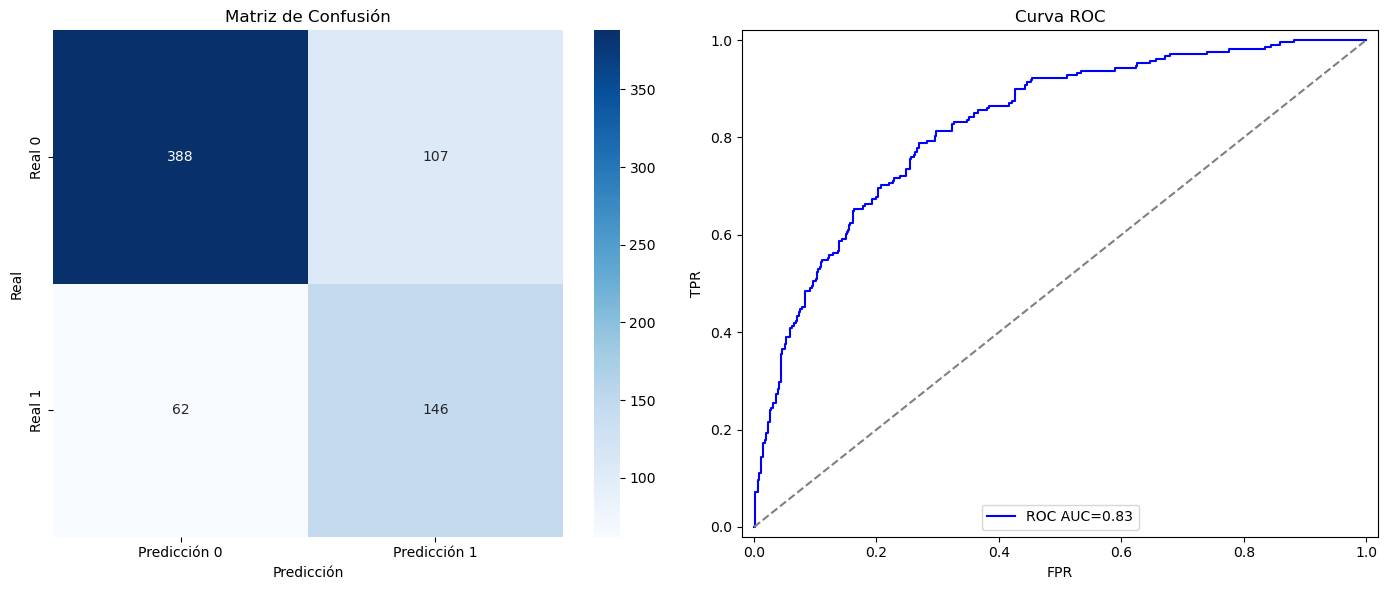

Evaluación final en el conjunto de prueba:
Accuracy: 0.75
ROC AUC: 0.82
Recall: 0.70
F1 Score: 0.61


In [33]:
model1 = LogisticRegression()
params1 = {'C': 1.0, 'max_iter': 50, 'solver': 'liblinear'}

# Evaluar el modelo
df_eval_stats = evaluate_model(df, target_column='Churn', model=model1, params=params1)
evaluate_model_with_test(df, target_column='Churn', model=model1, smote=smote)

El modelo de regresión logística tiene un desempeño razonable en cuanto a ROC AUC (0.83), lo que muestra que el modelo tiene una buena capacidad de distinguir entre las clases. El Recall de 0.70 es sólido, lo que indica que el modelo puede identificar adecuadamente el 70% de los clientes que se dan de baja. Sin embargo, tiene un F1 Score bajo de 0.63, lo que indica que, aunque es razonablemente bueno para identificar a los clientes que se dieron de baja, genera una cantidad considerable de falsos positivos (107) y falsos negativos (62), lo que reduce su capacidad para hacer predicciones equilibradas.

#### 2do Modelo: Árbol de Decisión

In [34]:
# Parámetros a ajustar
param_grid1 = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11]}

# GridSearchCV para encontrar los mejores hiperparámetros
model2 = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(model2, param_grid1, cv=3, n_jobs=-1)
grid_search_dt.fit(X_train_res, y_train_res)
best_dt_model = grid_search_dt.best_estimator_
print("Mejores parámetros:", grid_search_dt.best_params_)

Mejores parámetros: {'max_depth': 11}


Evaluación del modelo:
   Accuracy  ROC AUC  Recall  F1 Score
0      0.81     0.85    0.74       0.7


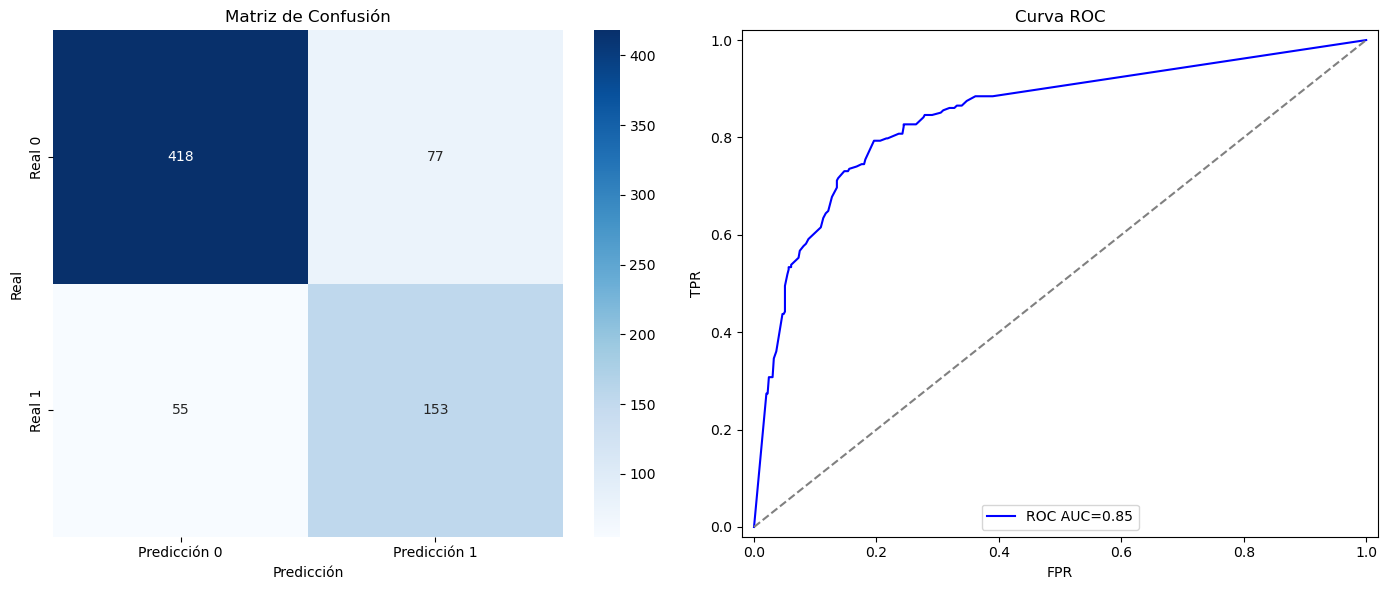

Evaluación final en el conjunto de prueba:
Accuracy: 0.78
ROC AUC: 0.83
Recall: 0.69
F1 Score: 0.63


In [35]:
params2 = {'max_depth': 11}
# Evaluar el modelo
df_eval_stats = evaluate_model(df, target_column='Churn', model= model2, params= params2)
evaluate_model_with_test(df, target_column='Churn', model=model2, smote=smote)

El Árbol de Decisión tiene un recall de 0.74, que es superior al de la Regresión Logística, indicando que es mejor para identificar clientes que se dan de baja. No obstante, genera falsos positivos (77) y falsos negativos (55), lo que muestra que tiene un buen desempeño, pero todavía se podrían mejorar las predicciones. El Accuracy de 0.81 refleja que tiene un buen balance general entre la identificación de clases correctas y erróneas.

#### 3er Modelo: Random Forest

In [36]:
# Parámetros a ajustar
param_grid2 = {'max_features': ['sqrt', 'log2'],
    'n_estimators': [1,2,3,4,5,6,7,8,9],
    'max_depth': [1,2,3,4,5,6,7,8]}

# GridSearchCV para encontrar los mejores hiperparámetros
model3 = RandomForestClassifier()
grid_search_dt = GridSearchCV(model3, param_grid2, cv=3, n_jobs=-1)
grid_search_dt.fit(X_train_res, y_train_res)
best_dt_model = grid_search_dt.best_estimator_
print("Mejores parámetros:", grid_search_dt.best_params_)


Mejores parámetros: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 6}


Evaluación del modelo:
   Accuracy  ROC AUC  Recall  F1 Score
0      0.79     0.87    0.77      0.68


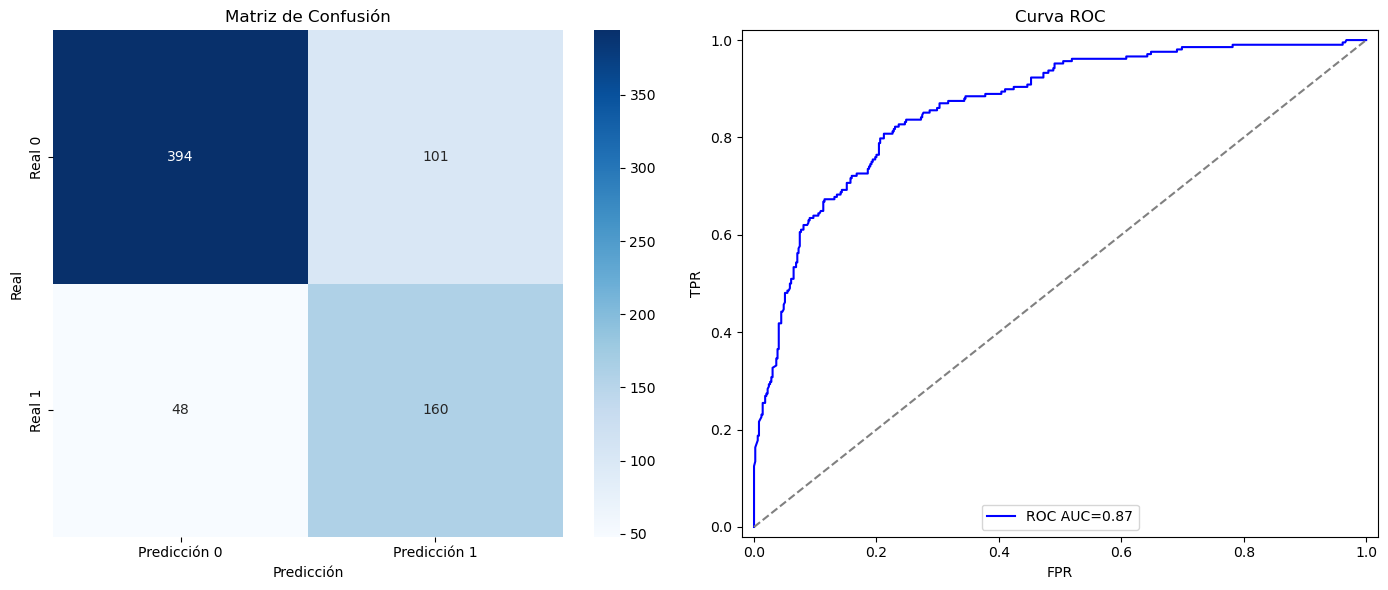

Evaluación final en el conjunto de prueba:
Accuracy: 0.79
ROC AUC: 0.85
Recall: 0.76
F1 Score: 0.66


In [42]:
params3 = {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 6}
# Evaluar el modelo
df_eval_stats = evaluate_model(df, target_column='Churn', model= model3, params= params3)
evaluate_model_with_test(df, target_column='Churn', model=model3, smote=smote)

El Random Forest presenta una ROC AUC sutilmente mayo que el Árbol de Decisión (0.87), indicando una capacidad sólida para discriminar entre las clases. Sin embargo, el modelo tiene una tasa de falsos positivos (101) más alta que el Árbol de Decisión, lo que afecta su capacidad para predecir correctamente los clientes que se dan de baja. 

#### 4to Modelo: XGBoost

In [38]:
# Parámetros a ajustar
param_grid3= {'max_depth': [3, 4, 5, 6, 7],'n_estimators': [50, 100, 150],  
    'learning_rate': [0.01, 0.05, 0.1], 'subsample': [0.8, 0.9, 1.0] }  

# GridSearchCV para encontrar los mejores hiperparámetros
model4 = XGBClassifier()
grid_search_dt = GridSearchCV(model4, param_grid3, cv=3, n_jobs=-1)
grid_search_dt.fit(X_train_res, y_train_res)
best_dt_model = grid_search_dt.best_estimator_
print("Mejores parámetros:", grid_search_dt.best_params_)

Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9}


Evaluación del modelo:
   Accuracy  ROC AUC  Recall  F1 Score
0      0.89     0.93    0.75       0.8


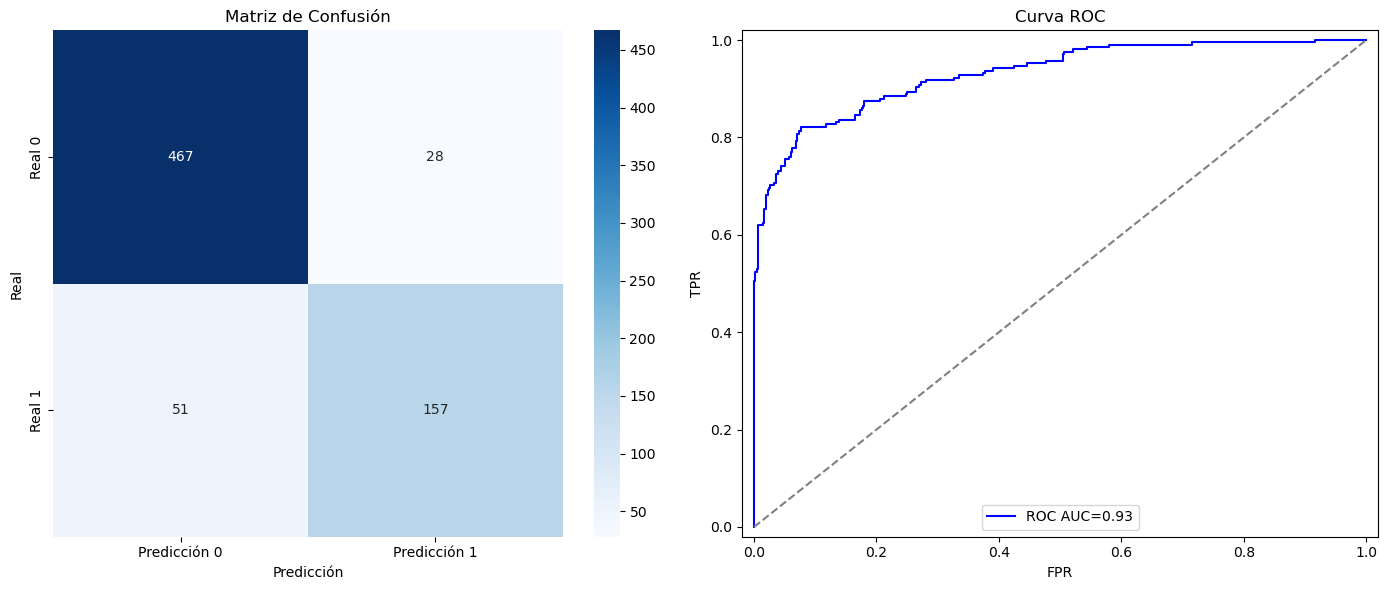

Evaluación final en el conjunto de prueba:
Accuracy: 0.88
ROC AUC: 0.93
Recall: 0.75
F1 Score: 0.78


In [39]:
params4 = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9}
# Evaluar el modelo
df_eval_stats = evaluate_model(df, target_column='Churn', model= model4, params= params4)
evaluate_model_with_test(df, target_column='Churn', model=model4, smote=smote)

XGBoost es el modelo con mejor rendimiento en términos de ROC AUC (0.93), lo que indica una gran capacidad para distinguir entre las clases. Además, tiene un Recall de 0.75, lo que significa que puede identificar de manera efectiva a los clientes que se dan de baja (157 verdaderos positivos). El modelo también tiene una cantidad muy baja de falsos positivos (28), lo que contribuye a su F1 Score alto de 0.80. Los falsos negativos (51) son relativamente bajos, lo que lo hace ideal para este tipo de problemas de clasificación.

#### 5to Modelo: CatBoost

In [40]:
# Parámetros a ajustar
param_grid4= {'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0]}  

# GridSearchCV para encontrar los mejores hiperparámetros
model5 = CatBoostClassifier(verbose= 0)
grid_search_dt = GridSearchCV(model5, param_grid4, cv=3, n_jobs=-1)
grid_search_dt.fit(X_train_res, y_train_res)
best_dt_model = grid_search_dt.best_estimator_
print("Mejores parámetros:", grid_search_dt.best_params_)

Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 1.0}


Evaluación del modelo:
   Accuracy  ROC AUC  Recall  F1 Score
0      0.85     0.92    0.75      0.74


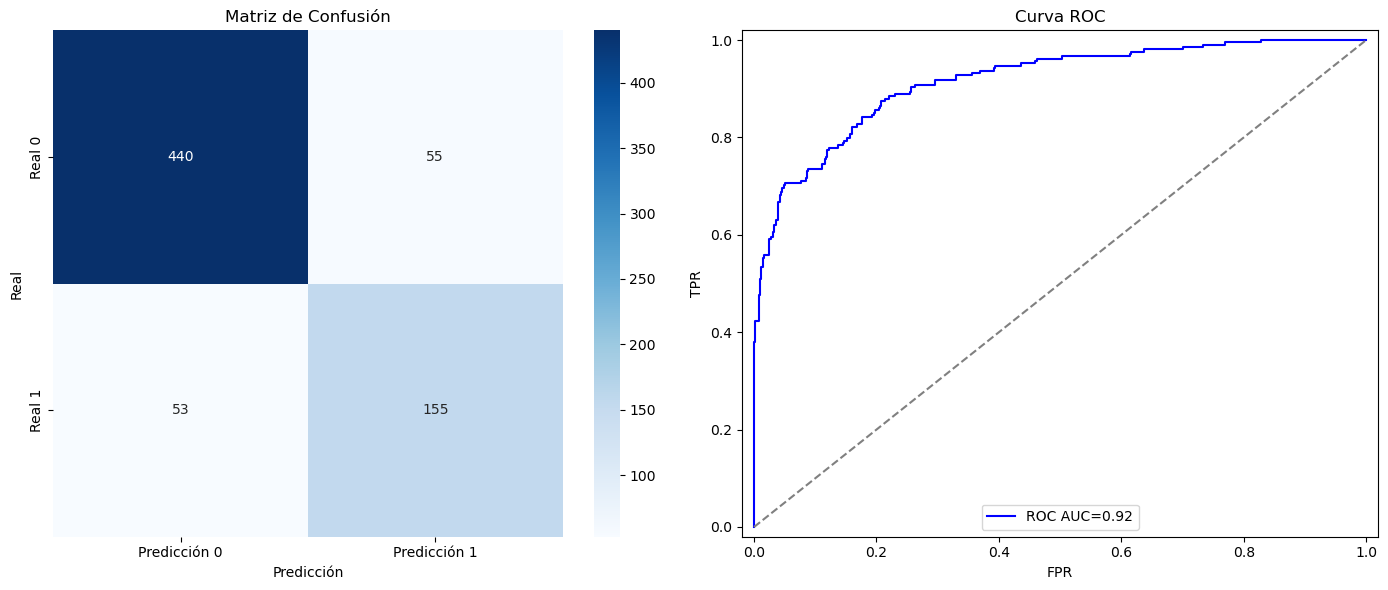

Evaluación final en el conjunto de prueba:
Accuracy: 0.85
ROC AUC: 0.91
Recall: 0.75
F1 Score: 0.73


In [41]:
params5 = {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 1.0,'cat_features': None}
# Evaluar el modelo
df_eval_stats = evaluate_model(df, target_column='Churn', model= model5, params= params5)
evaluate_model_with_test(df, target_column='Churn', model=model5, smote=smote)

CatBoost tiene un buen rendimiento general, con un ROC AUC de 0.92 y un Recall de 0.75. Esto muestra que el modelo es bastante efectivo para identificar a los clientes que se dan de baja, similar a XGBoost. Sin embargo, CatBoost tiene una tasa de falsos positivos (55) y falsos negativos (53) un poco más alta en comparación con XGBoost, lo que afecta ligeramente su rendimiento en la predicción equilibrada de clases. A pesar de esto, su F1 Score de 0.74 es muy competitivo y destaca en comparación con otros modelos.

### Paso 5. Preparación del Informe

Objetivo: Documentar y comunicar los resultados y hallazgos del análisis y modelado.


#### Resumen del Preprocesamiento y del Análisis Exploratorio: 

Para el Preprocesamiento se cargaron e inspeccionaron los datos de todos los archivos CSV, corrigiendo valores no numéricos en la columna TotalCharges y convirtiendo fechas a tipo datetime. Se creó la columna Churn para indicar si un cliente canceló el servicio, y se reemplazaron los valores faltantes en columnas binarias con 0 y en InternetService con "No". Las tablas se unieron en un solo DataFrame usando customerID, y las columnas "Yes"/"No" se codificaron como valores binarios. 

En el caso del EDA se obtuvieron las siguientes observaciones claves: 
1. Distribución de la cancelación (Churn): Aproximadamente el 27% de los clientes han cancelado sus servicios (Churn = 1), mientras que el 73% permanece activo (Churn = 0).

2. Patrones temporales de cancelación: Se observó un aumento en las cancelaciones a lo largo de los años, destacando un pico notable en 2019. Además, las cancelaciones son más frecuentes de septiembre a diciembre, posiblemente debido a factores estacionales.

3. Relación con variables categóricas: Los clientes con contratos mes a mes y los que utilizan métodos de pago como Electronic check muestran tasas más altas de cancelación. Además, los clientes que usan fibra óptica tienen una mayor tasa de cancelación que los usuarios de DSL.

4. Características booleanas y cancelación: Variables como "Partner", "Dependents", "TechSupport" y "OnlineSecurity" están negativamente correlacionadas con la cancelación, indicando que los clientes sin pareja o dependientes, o que no usan soporte técnico o seguridad en línea, tienden a cancelar más. En cambio, "PaperlessBilling" y "SeniorCitizen" tienen correlación positiva, sugiriendo que los clientes mayores o que utilizan facturación electrónica tienen mayor probabilidad de cancelar.

5. Correlación con variables numéricas (MonthlyCharges y TotalCharges): Los clientes que cancelan (Churn = 1) tienden a pagar más mensualmente (MonthlyCharges promedio de 74.44) pero tienen un TotalCharges más bajo (1531.80) en comparación con los clientes activos.


#### Resultados del Modelado: Comparación Final
A continuación, se presenta una tabla comparativa con los resultados de los modelos evaluados:


| Modelo  | Accuracy  | ROC AUC  | Recall  | F1 Score  |
|---|:---:|:---:|:---:|:---:|
| Logistic Regression  | 0.76  | 0.83  | 0.70  | 0.63  |
| Decision Tree  | 0.81  | 0.85  | 0.74  | 0.70  |
| Random Forest  | 0.79  | 0.87  | 0.77  | 0.68  |
| XGBoost  | 0.89  | 0.93  | 0.75  | 0.80  |
| CatBoost  | 0.85  | 0.92  | 0.75  | 0.74  | 



- XGBoost sobresale como el modelo más eficaz, con un ROC AUC de 0.93, Recall de 0.75, y F1 Score de 0.80. Su excelente desempeño en la predicción de la cancelación de clientes se debe a un bajo número de falsos positivos (28) y un buen balance en la identificación de clientes en riesgo de cancelar el servicio.
- CatBoost lo sigue de cerca con una ROC AUC de 0.92 y Recall de 0.75, pero tiene una ligera penalización en comparación con XGBoost debido a los falsos positivos (55) y falsos negativos (53) más altos.
- Los modelos Random Forest, Decision Tree y Logistic Regression tuvieron un rendimiento inferior, con métricas como F1 Score y Recall más bajas, lo que indica que no son tan efectivos para predecir la cancelación de clientes en comparación con XGBoost y CatBoost.

En resumen, XGBoost es el modelo más robusto y efectivo para la predicción de Churn, destacándose en todas las métricas clave y presentando una baja tasa de falsos positivos y falsos negativos, seguido de cerca por CatBoost, y ambos superaron significativamente a los otros modelos evaluados como Logistic Regression y Decision Tree.





#### Recomendaciones para la empresa: 

1. Identificación de Clientes de Alto Riesgo: Basado en los modelos CatBoost y XGBoost, los cuales mostraron una excelente capacidad predictiva con un ROC AUC de 0.92-0.93, se debe identificar a los clientes con alta probabilidad de cancelación. Esto se puede lograr utilizando características como el tipo de contrato (mes a mes), métodos de pago (Electronic check) y tipo de servicio (fibra óptica).

2. Intervenciones Proactivas:
    - Ofertas Personalizadas: Diseñar descuentos o promociones para los clientes con alta probabilidad de churn, especialmente aquellos con contratos mes a mes o que usan pagos electrónicos.
    - Soporte Dedicado: Ofrecer asistencia personalizada, particularmente a clientes que no utilizan soporte técnico ni seguridad en línea, ya que están más propensos a cancelar.
    - Plan de Retención para Clientes Senior y con Facturación Electrónica: Los clientes mayores y los que usan facturación electrónica tienen mayor probabilidad de cancelar, por lo que se podrían diseñar estrategias específicas para este grupo, como planes exclusivos o beneficios adicionales para la retención.

3. Optimización de la Oferta y la Experiencia del Cliente:
    - Mejorar la Infraestructura de Fibra Óptica: Como los clientes con fibra óptica tienen mayores tasas de cancelación, se recomienda revisar y optimizar la calidad del servicio para este grupo.
    - Monitoreo de Facturación: Dado que los clientes que cancelan tienen un TotalCharges más bajo pero MonthlyCharges más altos, se podría evaluar la posibilidad de ajustar los precios o proporcionar planes más adecuados.

4. Segmentación y Estrategias de Retención: Realizar una segmentación más detallada de los clientes según su probabilidad de churn y aplicar estrategias diferenciadas según las características de cada grupo. Por ejemplo, ofrecer a los clientes con mayor riesgo de cancelación promociones de retención específicas o mejorar su experiencia de usuario.

5. Actualización y Reentrenamiento del Modelo Predictivo: Actualizar y reentrenar el modelo predictivo de manera continua para mejorar su capacidad de anticipar el churn. A medida que se recojan más datos, el modelo puede ser ajustado para mejorar su precisión y adaptar las estrategias de intervención de manera más efectiva.

Estas acciones permitirán a la empresa reducir efectivamente la tasa de churn, enfocándose en los clientes más propensos a cancelar y ofreciendo soluciones adaptadas a sus necesidades y características.



#### Conclusiones Finales:

El análisis realizado permite concluir que XGBoost es el modelo más efectivo para predecir la cancelación de clientes (Churn) en Interconnect, con un ROC AUC de 0.93 y un Recall de 0.75. CatBoost también presenta buenos resultados, aunque con más falsos positivos y negativos. Los modelos tradicionales como Logistic Regression y Random Forest tienen un desempeño inferior.

A través de estas predicciones, la empresa puede implementar estrategias de marketing proactivas y personalizadas, como ofrecer promociones o planes especiales a los clientes con mayor probabilidad de churn. Además, se pueden diseñar intervenciones específicas, como atención dedicada a clientes con ciertos servicios o características que los hacen más propensos a la cancelación.

En resumen, estos modelos permiten a Interconnect optimizar su estrategia de retención, enfocándose en los clientes más vulnerables y mejorando su experiencia, lo que puede reducir significativamente la tasa de cancelación y mejorar la rentabilidad de la empresa.